In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
from adjustText import adjust_text
%matplotlib inline

In [2]:
df = pd.read_csv('../data/EPL 19-20 outfield_colR.csv')
df1 = pd.read_csv('../data/EFL 19-20 outfield_colR.csv')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.concat([df, df1], axis=0)

In [4]:
df

,player_id,position,player,age,team_id,team,foot,mins_played,nineties,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,interception,total_clearance,effective_clearance,total_long_balls,accurate_long_balls,passes_right,passes_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_fastbreak,att_rf_total,att_lf_total,att_hd_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,head_pass,challenge_lost,aerial_won,aerial_lost,pen_goals_conceded,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,total_pull_back,accurate_pull_back,goal_assist_openplay,att_assist_openplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,second_goal_assist,hit_woodwork,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,total_fastbreak,att_one_on_one,fouled_final_third,goals_openplay,att_openplay,assist_pass_lost,assist_blocked_shot,assist_attempt_saved,assist_post,assist_free_kick_won,assist_handball_won,assist_own_goal,assist_penalty_won,open_play_pass,successful_open_play_pass,attempted_tackle_foul,put_through,successful_put_through,blocked_pass,touches_in_opp_box,attempts_ibox,attempts_obox,expected_goals_nonpenalty,expected_goals_openplay,expected_goals_hd,expected_goals_lf,expected_goals_rf,expected_goals_conceded,expected_goals_nonpenalty_conceded,expected_goalsontarget,expected_goalsontarget_nonpenalty,expected_goalsontarget_nonpenalty_conceded,expected_assists,expected_assists_openplay
0,95658,Defender,Harry Maguire,27.2,1,Manchester United,Right,2610,29.000000,0.896552,0.275862,0.206897,0.034483,0.000000,0.000000,62.896552,53.551724,0.068966,0.000000,24.137931,18.448276,0.034483,0.034483,0.034483,0.344828,0.482759,1.103448,0.689655,0.310345,0.689655,0.206897,0.827586,0.0

In [5]:
# Filter for Defenders
mask = (df.position == 'Defender')
df = df.loc[mask]

In [6]:
players = df['player'].tolist()

In [7]:
# Drop columns
df1 = df.drop(['position', 'player', 'team', 'foot', 'mins_played', 'nineties'], axis=1)

In [8]:
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [9]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [10]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

In [11]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [12]:
clusters_df

,num_clusters,cluster_errors
0,1,356.662664
1,2,158.879609
2,3,108.752212
3,4,75.857743
4,5,57.094102
5,6,46.343764
6,7,38.896856
7,8,32.313920
8,9,28.404510
9,10,25.645600


In [14]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [15]:
transformed['cluster'] = clusters

In [16]:
players

['Harry Maguire',
 'Victor Lindelöf',
 'Aaron Wan-Bissaka',
 'Luke Shaw',
 'Ashley Young',
 'Brandon Williams',
 'David Luiz',
 'Sokratis',
 'Sead Kolasinac',
 'Calum Chambers',
 'Héctor Bellerín',
 'Shkodran Mustafi',
 'Federico Fernández',
 'Jamaal Lascelles',
 'Jetro Willems',
 'Fabian Schär',
 'Paul Dummett',
 'Ciaran Clark',
 'Javier Manquillo',
 'DeAndre Yedlin',
 'Emil Krafth',
 'Toby Alderweireld',
 'Serge Aurier',
 'Davinson Sánchez',
 'Jan Vertonghen',
 'Danny Rose',
 'Ben Davies',
 'Japhet Tanganga',
 'Tyrone Mings',
 'Frederic Guilbert',
 'Matt Targett',
 'Björn Engels',
 'Ezri Konsa Ngoyo',
 'Kortney Hause',
 'Neil Taylor',
 'Ahmed El Mohamady',
 'César Azpilicueta',
 'Kurt Zouma',
 'Fikayo Tomori',
 'Andreas Christensen',
 'Antonio Rüdiger',
 'Reece James',
 'Emerson',
 'Marcos Alonso',
 'Lucas Digne',
 'Yerry Mina',
 'Michael Keane',
 'Mason Holgate',
 'Djibril Sidibé',
 'Séamus Coleman',
 'Jonny Evans',
 'Ricardo Pereira',
 'Çaglar Söyüncü',
 'Ben Chilwell',
 'Christian

In [17]:
transformed['player'] = players

In [18]:
transformed.columns = ['x','y','cluster','name']

In [19]:
transformed

,x,y,cluster,name
0,-0.992085,1.205042,4,Harry Maguire
1,-1.000890,0.191199,1,Victor Lindelöf
2,1.280053,-0.317608,0,Aaron Wan-Bissaka
3,0.811341,0.377607,0,Luke Shaw
4,1.326585,0.110149,0,Ashley Young
...,...,...,...,...
166,0.798908,-0.130329,0,Nathan Ferguson
167,0.768125,-0.320746,0,Conor Townsend
168,-0.127887,0.111945,1,Dara O'Shea
169,1.206491,0.504668,0,Kieran Gibbs


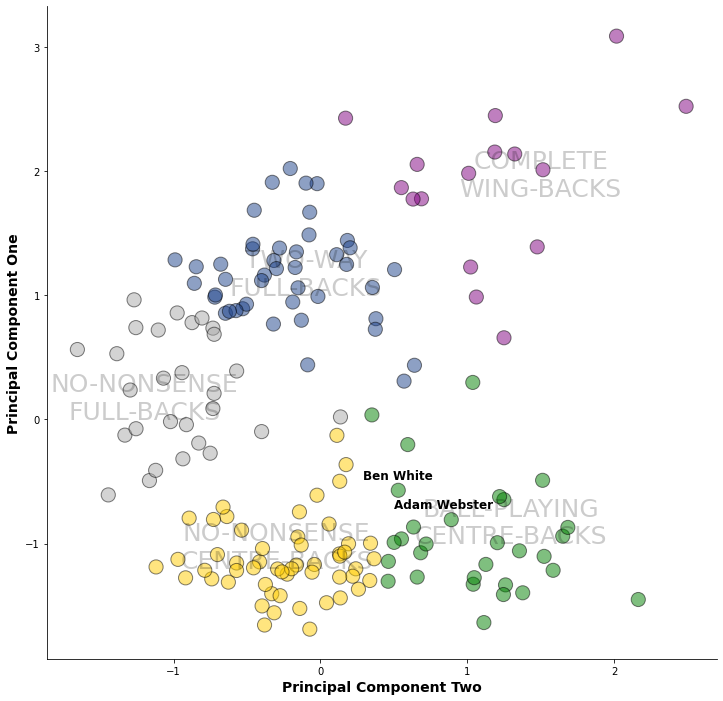

In [107]:
fig, ax = plt.subplots(figsize=(12,12))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

clr = {0:'#1D428A', 1:'#FFCD00', 2:'green', 3:'darkgrey', 4:'purple'}

# ax.scatter(def_o['y'], def_o['x'], s=200, facecolors='#E3E3E3', edgecolors='grey', zorder=2, alpha=0.8)
ax.scatter(transformed['y'], transformed['x'], s=200, c=transformed['cluster'].apply(lambda x: clr[x]), zorder=2,
           edgecolors='black', linewidths=1,alpha=0.5)

dx, dy = transformed.y.values, transformed.x.values
for i in range(len(transformed)):
    if transformed.name.iloc[i] == "Ben White":
        ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)
    elif transformed.name.iloc[i] == "Adam Webster":
        ax.text(dx[i]-0.05,dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)


ax.text(1.3,-1, 'BALL-PLAYING\nCENTRE-BACKS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(-0.3,-1.2, 'NO-NONSENSE\nCENTRE-BACKS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(-1.2,0, 'NO-NONSENSE\nFULL-BACKS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(-0.1,1, 'TWO-WAY\nFULL-BACKS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(1.5,1.8, 'COMPLETE\nWING-BACKS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')

# Label axis
ax.set_ylabel("Principal Component One",fontsize=14,fontweight="bold",color="black")
ax.set_xlabel("Principal Component Two",fontsize=14,fontweight="bold",color="black");

plt.savefig("PCA_def", dip=500, bbox_inches='tight',transparent=True)

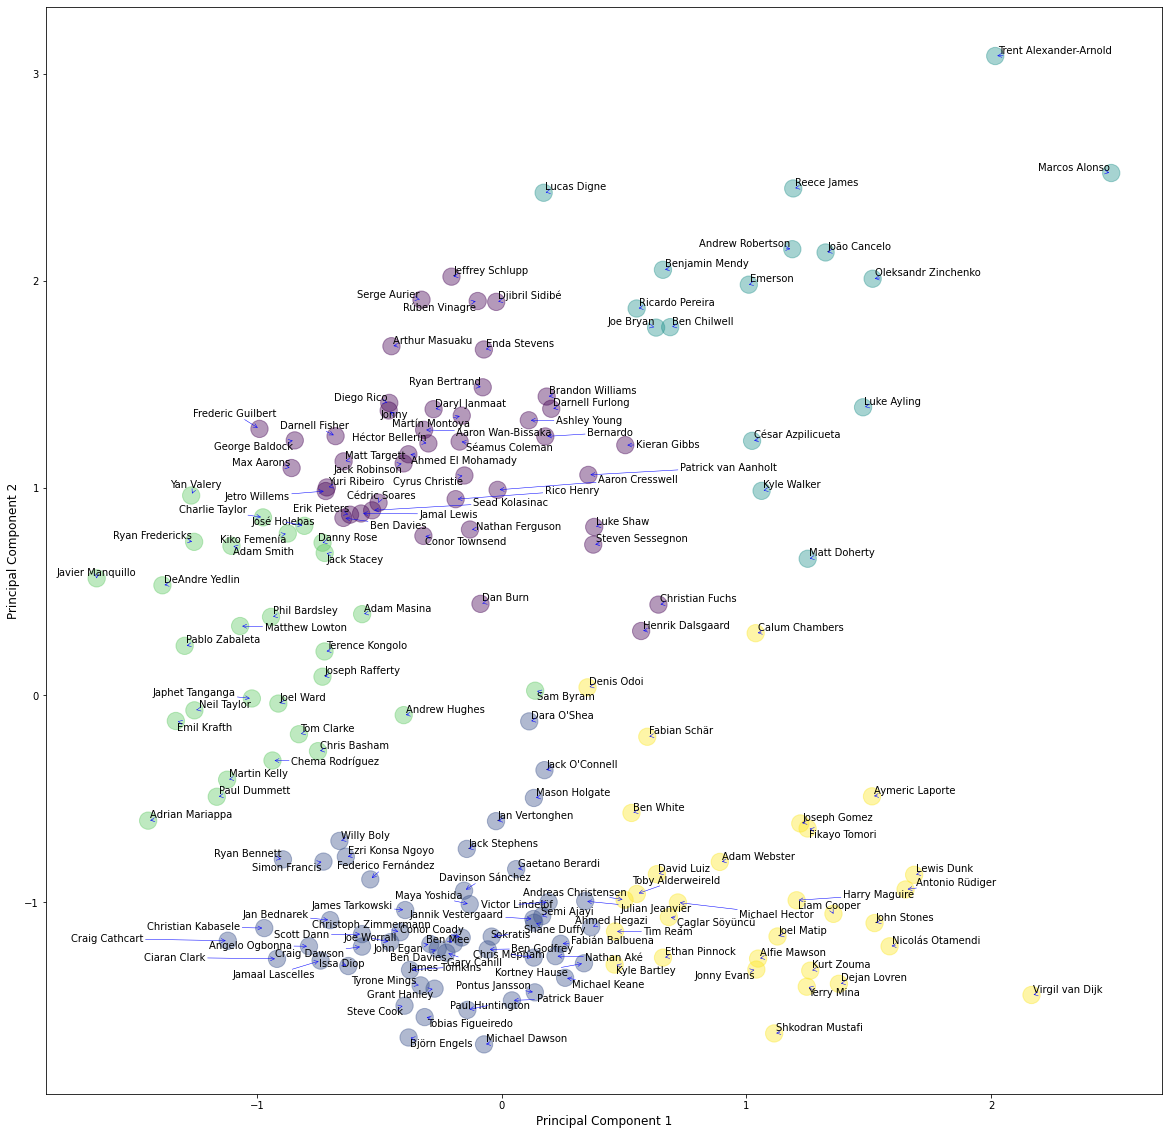

In [20]:
fig, ax = plt.subplots(figsize=(20,20))

v = transformed['cluster']

ax.scatter(transformed['y'], transformed['x'], s=300, c=v, zorder=2, alpha=0.4)

texts = []
for y, x, s in zip(transformed.y, transformed.x, transformed.name):
    texts.append(plt.text(y, x, s))
adjust_text((texts) , arrowprops=dict(arrowstyle="->", color='b', lw=0.5));

# Label axis
ax.set_ylabel("Principal Component 2",fontsize=12)
ax.set_xlabel("Principal Component 1",fontsize=12);

# ax.savefig("def_kmeans.jpg");